# Algorytm Monte Carlo - estymacja liczby π

## Projekt przygotowany przez Izabelę Karczewską
### Import potrzebnych biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
np.random.seed(46)

### Funkcje
#### Przygotowuję trzy funkcje, które ułatwią mi obliczenia i rysowanie wykresów. 
1. Funkcja **generate_points** generująca punkty na określonym obszarze

In [19]:
def generate_points(n, r=1):
    x = np.random.uniform(0, r, n)
    y = np.random.uniform(0, r, n)
    return pd.DataFrame({"X":x, "Y":y})

2. Funkcja **estimation** która:
   * sprawdza które punkty są w obrębie koła o zadanym promieniu
   * oblicza oszacowanie π

In [20]:
def estimation(points, r = 1):
    n_inside = 0
    n = len(points)
    points["In_circle"] = 0
    for i in range(0,len(points)):
        fi = math.sqrt(r**2-points.X.iloc[i]**2)
        if points.Y.iloc[i] <= fi:
            n_inside += 1
            points.loc[i, "In_circle"] = 1
    pi_estimate = 4*n_inside/n
    return pi_estimate, points     

2. Funcka **drawing_function**, w której za pomocą różnicy w kolorach zaznaczam, które punkty leżą wewnątrz okręgu, a które poza nim. Dodatkowo rysuję linię okręgu, aby widzieć granicę tych dwóch obszarów.

In [27]:
def drawing_function(ax, points, n, pi):
    x_circle = np.linspace(0, 1, num=100)
    y_circle = np.sqrt(1 - x_circle**2)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'Liczba punktów - {n}, Pi ≈ {pi:.4f}', fontsize=15)
    sns.scatterplot(data=points, x="X", y="Y", ax=ax, hue="In_circle", palette="spring")
    sns.lineplot(x=x_circle, y=y_circle, ax=ax, color="black", linewidth=2)
    ax.legend(title="Czy w obrębie koła?", loc="upper right", labels=["Tak", "Nie"])

### Wizualizacja wylosowanych punktów
Losuję punkty, obliczam wartość π oraz wyświetlam wykresy dla konkretnej liczby punktów **n**:
* n = 100
* n = 1000
* n = 10000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


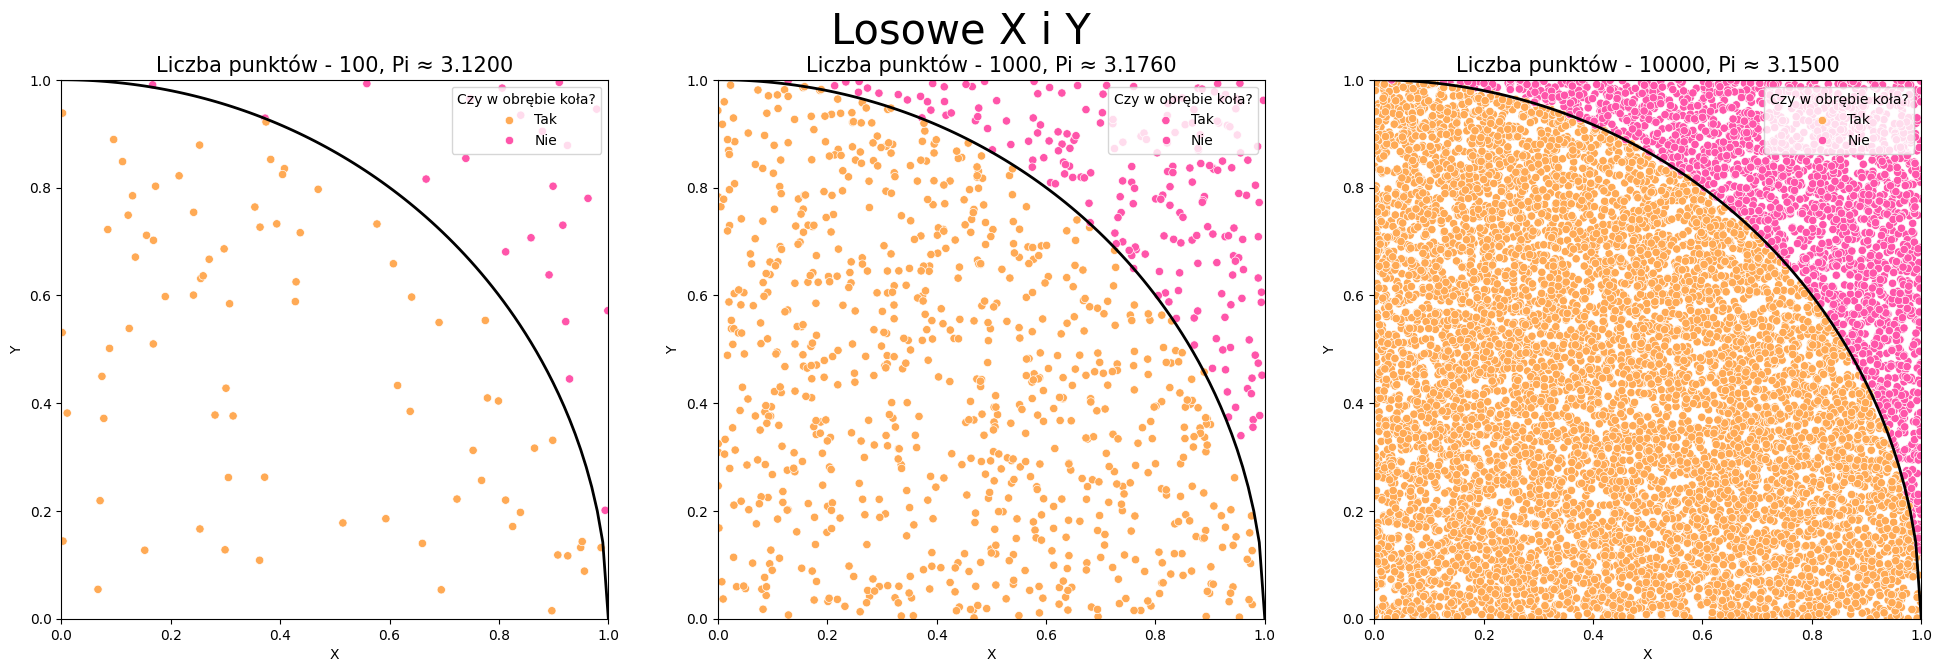

In [30]:
fig, ax = plt.subplots(1,3, figsize = (24,7))
fig.suptitle("Losowe X i Y", fontsize = 30)
n = [100, 1000, 10000]
plt.legend(facecolor=(1,1,1)

for i, n_val in enumerate(n):
    points = generate_points(n_val)
    pi, points_with_index = estimation(points)
    drawing_function(ax[i], points_with_index, n_val, pi)